<a href="https://colab.research.google.com/github/Ambg0231/DeepLearning/blob/main/TALLER_Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.04%20-%20%5BTALLER%5D%20Customized%20loss%20functions%20and%20regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

# Taller - Customized loss function

**Ángela Burgos, Sandra Escobar**

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False);

replicating local resources


In [2]:
import os
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf
tf.__version__

'2.17.0'

La historia de callback

El historial del callback se devuelve de forma predeterminada cada vez que entrenas un modelo con el método .fit(). Para acceder a estas métricas, puede acceder al parámetro del diccionario histórico dentro del objeto h_callback devuelto con las claves correspondientes.

El modelo de máquina de riego que creó en la lección anterior se carga para que lo entrene, junto con sus características y etiquetas ahora cargadas como X_train, y_train, X_test, y_test. Esta vez almacenará la devolución de llamada del historial del modelo y utilizará el parámetro validation_data mientras entrena.

Trazará los resultados almacenados en el historial con plot_accuracy() y plot_loss(), dos funciones simples de matplotlib. Puede verificar su código en la consola pegando show_code(plot_loss).

¡Veamos el detrás de escena de nuestro entrenamiento!

In [3]:
irrigation_machine = pd.read_csv('local/data/irrigation_machine.csv').drop(['Unnamed: 0'], axis = 1)
print(f'Tamaño de la base de datos: {irrigation_machine.shape}')
irrigation_machine.head()

Tamaño de la base de datos: (2000, 23)


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [4]:
from sklearn.model_selection import train_test_split

X = irrigation_machine.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis = 1)
y = irrigation_machine[['parcel_0', 'parcel_1', 'parcel_2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 20), (600, 20), (1400, 3), (600, 3))

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()

model.add(Dense(64, input_shape = (20,), activation = 'relu'))

model.add(Dense(3, activation = 'sigmoid'))

model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

Definamos dos funciones para graficar los valores de las función de perdida y los valores del accuracy

In [8]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2237 - loss: 0.9001 - val_accuracy: 0.3950 - val_loss: 0.5771
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4818 - loss: 0.5429 - val_accuracy: 0.5067 - val_loss: 0.4448
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5374 - loss: 0.4186 - val_accuracy: 0.5350 - val_loss: 0.3713
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5767 - loss: 0.3683 - val_accuracy: 0.6150 - val_loss: 0.3411
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5966 - loss: 0.3138 - val_accuracy: 0.6200 - val_loss: 0.3151
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6160 - loss: 0.3011 - val_accuracy: 0.5333 - val_loss: 0.3003
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5879 - loss: 0.2910 - val_accuracy: 0.6150 - val_loss: 0.2892
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6021 - loss: 0.2795 - val_accuracy: 0.5417 - val_loss:

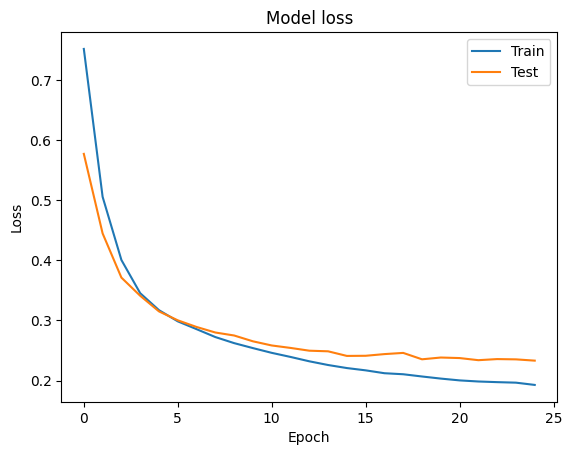

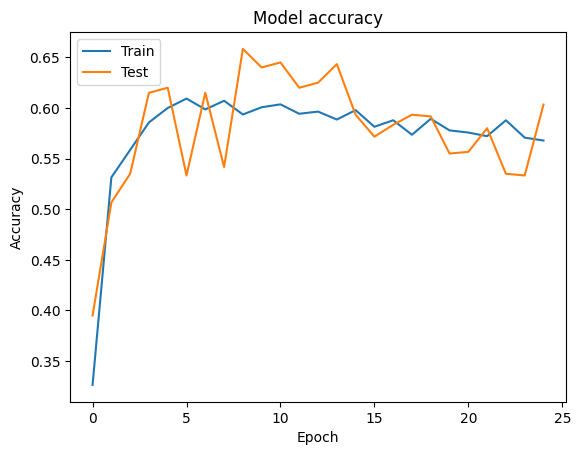

In [9]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

##  **Aplica a tu modelo la técnica de Early Stopping**

El callback del early stopping es útil ya que le permite detener el entrenamiento del modelo si ya no mejora después de un número determinado de épocas. Para hacer uso de esta funcionalidad, debe pasar el early stopping dentro de una lista al parámetro de devolución del callback del modelo en el método .fit().

Continuemos con la base de datos de calsificación de billetes falsos

In [10]:
banknotes = pd.read_csv('local/data/banknotes.csv')
print(f'Tamaño del dataframe {banknotes.shape}')
banknotes

Tamaño del dataframe (1372, 5)


,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [11]:
X = banknotes.drop(['class'], axis = 1)
y = banknotes['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 4), (412, 4), (960,), (412,))

In [12]:
# Importa el modelo sequential y las capas densas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Crea el modelo sequential
model = Sequential()

# Adiciaona una capa densa
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compila tu modelo
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Visualiza el summary de tu modlelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy',
                       patience=10)

# Train your model using the early stopping callback
model.fit(X_train, y_train,
           epochs=1000, validation_data=(X_test, y_test),
           callbacks= [monitor_val_acc])

Epoch 1/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6644 - loss: 1.0341 - val_accuracy: 0.8495 - val_loss: 0.3032
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8890 - loss: 0.2702 - val_accuracy: 0.9005 - val_loss: 0.2373
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.2064 - val_accuracy: 0.9150 - val_loss: 0.2165
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9451 - loss: 0.1853 - val_accuracy: 0.9150 - val_loss: 0.2033
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.1884 - val_accuracy: 0.9150 - val_loss: 0.1936
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9344 - loss: 0.1791 - val_accuracy: 0.9223 - val_loss: 0.1857
Epoch 7/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9506 - loss: 0.1529 - val_accuracy: 0.9296 - val_loss: 0.1790
Epoch 8/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9401 - loss: 0.1658 - val_accuracy: 0

¡Ahora nunca te quedarás corto en las épocas! Tu modelo se detendrá antes de tiempo si la cantidad monitoreada no mejora durante la cantidad de épocas determinada.

## **Combinación de Callbacks**

Los modelos de aprendizaje profundo pueden tardar mucho en entrenarse, especialmente cuando se pasa a arquitecturas más profundas y conjuntos de datos más grandes. Guardar tu modelo cada vez que mejora y detenerlo cuando ya no lo hace te permite preocuparte menos por elegir la cantidad de épocas para entrenar. También puedes restaurar un modelo guardado en cualquier momento y reanudar el entrenamiento donde lo dejaste.


Utilice las devoluciones de llamada EarlyStopping() y ModelCheckpoint().

In [18]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 10)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('best_banknote_model.keras', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    validation_data = (X_test, y_test))

Epoch 1/1000000000000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9684 - loss: 0.0944 - val_accuracy: 0.9733 - val_loss: 0.1013
Epoch 2/1000000000000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9778 - loss: 0.0848 - val_accuracy: 0.9733 - val_loss: 0.1004
Epoch 3/1000000000000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0845 - val_accuracy: 0.9733 - val_loss: 0.0995
Epoch 4/1000000000000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.0845 - val_accuracy: 0.9733 - val_loss: 0.0986
Epoch 5/1000000000000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9755 - loss: 0.0872 - val_accuracy: 0.9733 - val_loss: 0.0978
Epoch 6/1000000000000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9689 - loss: 0.0904 - val_accuracy: 0.9733 - val_loss: 0.0969
Epoch 7/1000000000000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9767 - loss: 0.0858 - val_accuracy: 0.9733 - val_loss: 0.0961
Epoch 8/1000000000000
30/30 ━━━━━━━━━━━━━

¡Has aprendido una poderosa combinación de callback! ¡Buenos movimientos! Ahora siempre guarda el modelo que funcionó mejor, incluso si se detuvo antes de tiempo en uno que ya estaba funcionando peor.